# 箱线图

箱线图（Box Plot），也称为盒须图（Box-and-Whisker Plot），是一种用于展示数据集的集中趋势和离散情况的统计图表。它主要显示数据的五个统计量：最小值、下四分位数（Q1）、中位数、上四分位数（Q3）以及最大值。

**适用场景**

- **多组定量数据的分布比较**：例如学校间或班级间测试成绩的比较。
- **质量控制**：用于监控产品质量的一致性。
- **人事测评**：比较不同员工的绩效表现。
- **数据分析**：展示不同类别或时间段的数据分布。

## 箱线图的组成部分

**箱体（Box）**：表示数据的 四分位数（quartiles）：
- **上四分位数（Q3）**：数据中 75% 的值小于该值。
- **下四分位数（Q1）**：数据中 25% 的值小于该值。
- **中位数（Median 或 Q2）**：数据的中间值，50%的数据小于该值

**箱线的边界（Whiskers）**：连接箱体和极值的线段，表示数据的 非异常范围
- **上边缘（Upper Whisker）**： 是 Q3 + 1.5 * IQR（IQR是指四分位距，也即箱体的长度，IQR = Q3 - Q1）
- **下边缘（Lower Whisker）**： 是 Q1 - 1.5 * IQR
- **异常值（Outliers）**：超出上边缘和下边缘的点称为离群点，通常被标记为单独的点

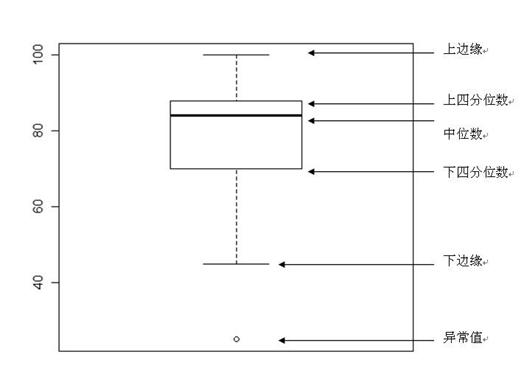

In [10]:
from IPython.display import Image
Image(filename='./pcitures/raw_pics/B09 python绘图——箱线图.jpeg', width=600, height=400) # 箱线图展示

## sns.boxplot
- `data`: 数据源，可以是 pandas DataFrame 或类似的数据结构。
- `x`: 用于x轴的变量
- `y`: 用于y轴的变量
- `hue`: 分类变量，数据按照该变量分组，可以使箱型图显示不同组别的比较
- `palette`: 颜色调色板
- `showmeans`: 是否标记均值
- `meanprops`: 均值标记样式

## 箱线图案例

**tips**: 餐饮小费数据集
- total_bill：账单金额
- tip：小费金额
- sex：性别（Male 或 Female）
- smoker：是否吸烟（Yes 或 No）
- day：星期几（Sun, Thu, Fri, Sat）
- time：就餐时间（Lunch 或 Dinner）
- size：就餐人数

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载内置数据集
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 基本箱线图

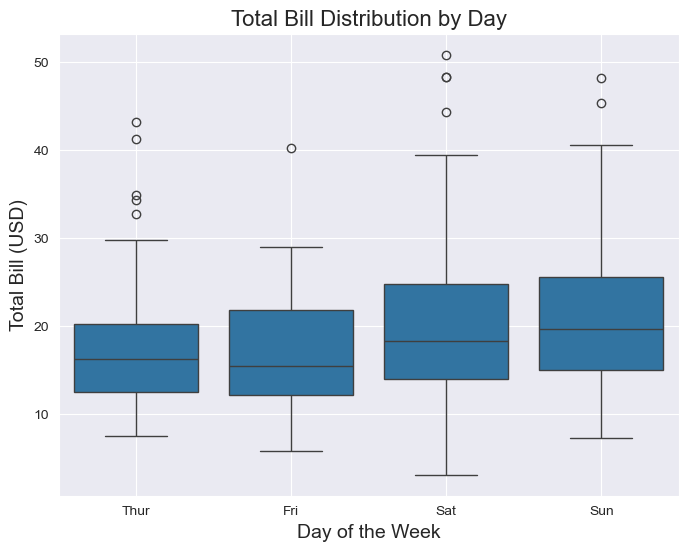

In [12]:
# 设置Seaborn的风格
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制箱线图
sns.boxplot(x='day', y='total_bill', data=tips)

# 设置标题和标签
plt.title('Total Bill Distribution by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Bill (USD)', fontsize=14)

# 增加网格线
plt.grid(True)

# 渲染、显示图表
plt.show()

### 分类变量hue

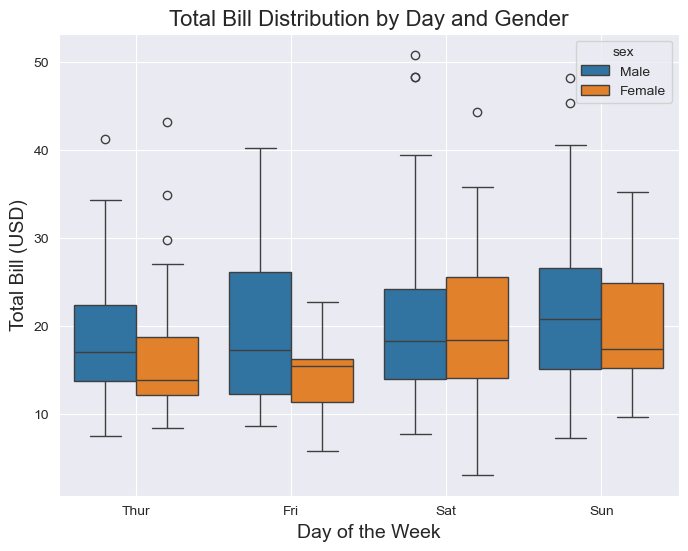

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
tips = sns.load_dataset("tips")

# 设置Seaborn的风格
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制带有 hue 参数的箱型图
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips)

# 设置标题和标签
plt.title('Total Bill Distribution by Day and Gender', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Bill (USD)', fontsize=14)

# 增加网格线
plt.grid(True)

# 渲染、显示图表
plt.show()

### 颜色调色板palette

#### 常见颜色调色板palette介绍

**Qualitative Palettes**：适合离散的类别数据，颜色彼此之间没有顺序或关联。
 
- 'deep'：默认的调色板，适合大部分情况。
- 'muted'：颜色较为柔和，适合多个类别的对比。
- 'pastel'：较为柔和的颜色，视觉上不那么刺眼。
- 'dark'：较为深沉的颜色，适合正式的图表。
- 'colorblind'：设计考虑到色盲友好，适合需要考虑视觉障碍的用户。
- 'Set1', 'Set2', 'Set3'：非常适合多个类别的颜色分配。
- 'Paired'：适合两两配对的颜色。
- 'Accent'：色调较鲜艳，适合强调特定类别。

**Sequential Palettes**：适合连续数据的颜色映射，从浅色到深色表示数据的从小到大的变化。
 
- 'Blues'：从浅蓝色到深蓝色。
- 'Greens'：从浅绿色到深绿色。
- 'Reds'：从浅红色到深红色。
- 'Purples'：从浅紫色到深紫色。
- 'YlGn'、'YlGnBu' 等：从黄色到绿色或蓝色。
- 'Oranges'、'YlOrBr'：从浅橙色到深橙色。
- 'BuGn'、'BuPu'：从浅蓝色到紫色等。

**Diverging Palettes**：适合表示有中值的连续数据，颜色从两端扩展到中间。
 
- 'RdBu'：从红色到蓝色，适合表示负值和正值。
- 'RdYlBu'：从红色到黄色再到蓝色，适合显示中立值。
- 'Spectral'：从紫色到蓝色再到红色，适合强烈的对比。

**Cyclic Palettes**：适合具有周期性的数据，颜色从一个极端到另一个极端，然后回到第一个极端。
 
- 'twilight'、'twilight_shifted'：常用于时间序列数据。

#### 不同palette调色板案例

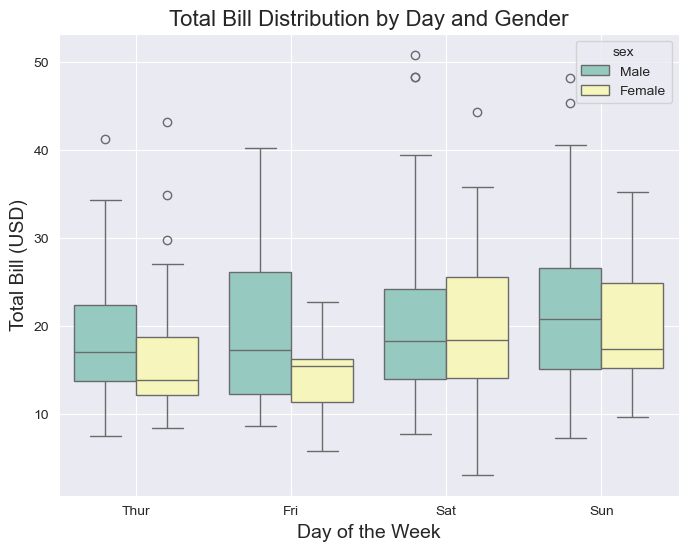

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
tips = sns.load_dataset("tips")

# 设置Seaborn的风格
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制带有 hue 参数的箱型图
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, palette='Set3')

# 设置标题和标签
plt.title('Total Bill Distribution by Day and Gender', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Bill (USD)', fontsize=14)

# 增加网格线
plt.grid(True)

# 渲染、显示图表
plt.show()


### 是否标记均值showmeans

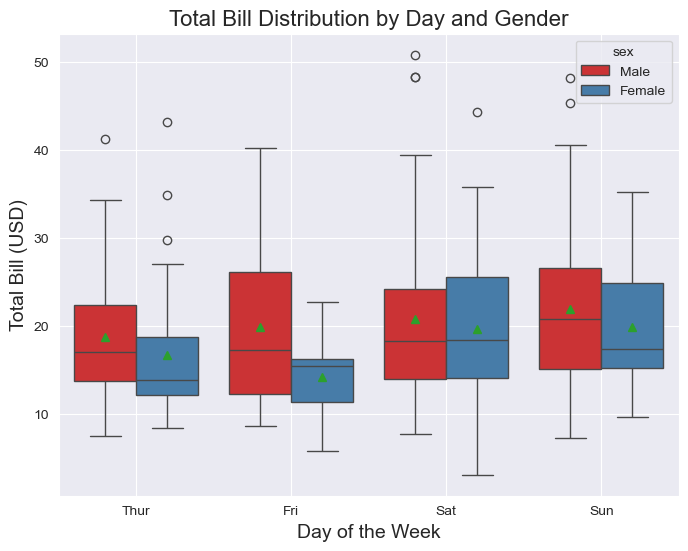

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
tips = sns.load_dataset("tips")

# 设置Seaborn的风格
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制带有 hue 和 showmeans 参数的箱型图
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, palette='Set1', showmeans=True)

# 设置标题和标签
plt.title('Total Bill Distribution by Day and Gender', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Bill (USD)', fontsize=14)

# 增加网格线
plt.grid(True)

# 渲染、显示图表
plt.show()


### 均值标记样式meanprops

- 'marker': 'o'：使用圆点 (o) 作为均值的标记。
    - 'o'（圆形）
    - 's'（方形）
    - 'D'（菱形）
    - '^'（三角形）
    - 'p' (五边形)
    - '*' (星形)
    - 'H' (六边形)
    - 'X' (十字形)
    - '+' (加号)
- 'markerfacecolor': 'black'：均值点填充颜色为黑色。
- 'markeredgecolor': 'red'：均值点的边框颜色为红色。
- 'markersize': 8：均值点的大小为 8（可以调整）。

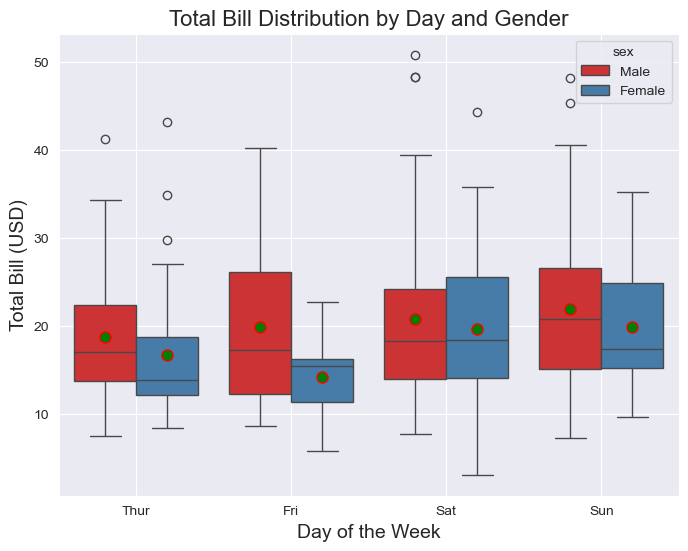

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
tips = sns.load_dataset("tips")

# 设置Seaborn的风格
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制带有 hue、showmeans 和 meanprops 参数的箱型图
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, palette='Set1', 
            showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'green', 
                                       'markeredgecolor':'red', 'markersize':8})

# 设置标题和标签
plt.title('Total Bill Distribution by Day and Gender', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Bill (USD)', fontsize=14)

# 增加网格线
plt.grid(True)

# 渲染、显示图表
plt.show()

### 水平箱线图

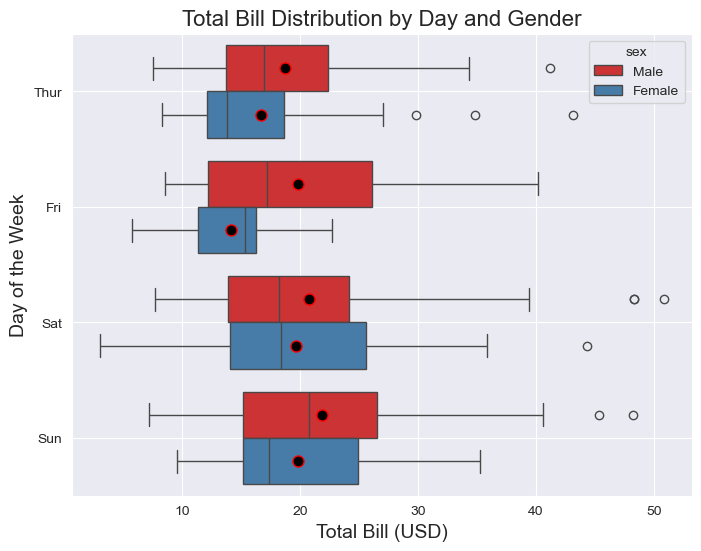

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
tips = sns.load_dataset("tips")

# 设置Seaborn的风格
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制带有 hue、showmeans 和 meanprops 参数的箱型图
sns.boxplot(x='total_bill', y='day', hue='sex', data=tips, palette='Set1', 
            showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'black', 
                                       'markeredgecolor':'red', 'markersize':8})

# 设置标题和标签
plt.title('Total Bill Distribution by Day and Gender', fontsize=16)
plt.xlabel('Total Bill (USD)', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)

# 增加网格线
plt.grid(True)

# 渲染、显示图表
plt.show()
